# DS3000: Summer Olympics Prediction Model

**Group Members**: Khushi Khan, Saanvi Vutukur, Maya Sachidanand, Serena Green 

**EDA**: We're going to clean up the data by removing duplicates, null values, converting columns to the proper types, and focusing our dataset on only Summer Olympics values. 

In [1]:
#importing necessary libraries for assignment
import pandas as pd

#reading in a csv file as a dataframe
athlete_df = pd.read_csv('athlete_events.csv')

athlete_df

C:\Users\khushi khan\AppData\Local\Temp\ipykernel_15116\1667961953.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [2]:
#only keeping rows in which the season is summer and after 1970
athlete_df = athlete_df[athlete_df['Season'] == 'Summer']
athlete_df = athlete_df[athlete_df['Year'] > 1970]

In [3]:
athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [4]:
athlete_df.isnull().sum()

ID             0
Name           0
Sex            0
Age          685
Height      6663
Weight      6921
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     121310
dtype: int64

In [5]:
#removing null values and duplicates
athlete_df = athlete_df.drop_duplicates()

In [6]:
#imputation for age, weight, height, and medal 
mean_age = athlete_df['Age'].mean()
athlete_df['Age'] = athlete_df['Age'].fillna(mean_age)
mean_weight = athlete_df['Weight'].mean()
athlete_df['Weight'] = athlete_df['Weight'].fillna(mean_weight)
mean_height = athlete_df['Height'].mean()
athlete_df['Height'] =  athlete_df['Height'].fillna(mean_height)
athlete_df['Medal'] = athlete_df['Medal'].fillna('No medal')

print(athlete_df.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [7]:
#checking the types of the data
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141858 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      141858 non-null  int64  
 1   Name    141858 non-null  object 
 2   Sex     141858 non-null  object 
 3   Age     141858 non-null  float64
 4   Height  141858 non-null  float64
 5   Weight  141858 non-null  float64
 6   Team    141858 non-null  object 
 7   NOC     141858 non-null  object 
 8   Games   141858 non-null  object 
 9   Year    141858 non-null  int64  
 10  Season  141858 non-null  object 
 11  City    141858 non-null  object 
 12  Sport   141858 non-null  object 
 13  Event   141858 non-null  object 
 14  Medal   141858 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 17.3+ MB


In [8]:
#converting columns to correct types
athlete_df['Name'] = athlete_df['Name'].astype('string')

#organizing the sex into a category
sex_category = pd.CategoricalDtype(categories=['M', 'F'],
                          ordered=False)

athlete_df['Sex'] = athlete_df['Sex'].astype(sex_category)

athlete_df['Age'] = athlete_df['Age'].astype(int)
athlete_df['Team'] = athlete_df['Team'].astype('string')
athlete_df['NOC'] = athlete_df['NOC'].astype('string')
athlete_df['Games'] = athlete_df['Games'].astype('string')

#organizing the seasons into a category
season_category = pd.CategoricalDtype(categories=['Summer', 'Winter'],
                          ordered=False)

athlete_df['Season'] = athlete_df['Season'].astype(season_category)

athlete_df['City'] = athlete_df['City'].astype('string')
athlete_df['Sport'] = athlete_df['Sport'].astype('string')
athlete_df['Event'] = athlete_df['Event'].astype('string')

#organizing the medals into a category
medal_category = pd.CategoricalDtype(categories=['Bronze', 'Silver', 'Gold', 'No medal'],
                          ordered=False)

athlete_df['Medal'] = athlete_df['Medal'].astype(medal_category)

athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141858 entries, 0 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      141858 non-null  int64   
 1   Name    141858 non-null  string  
 2   Sex     141858 non-null  category
 3   Age     141858 non-null  int32   
 4   Height  141858 non-null  float64 
 5   Weight  141858 non-null  float64 
 6   Team    141858 non-null  string  
 7   NOC     141858 non-null  string  
 8   Games   141858 non-null  string  
 9   Year    141858 non-null  int64   
 10  Season  141858 non-null  category
 11  City    141858 non-null  string  
 12  Sport   141858 non-null  string  
 13  Event   141858 non-null  string  
 14  Medal   141858 non-null  category
dtypes: category(3), float64(2), int32(1), int64(2), string(7)
memory usage: 13.9 MB


In [9]:
#ensure plots are always visible
%matplotlib inline

#import matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'GBR'),
  Text(2, 0, 'AUS'),
  Text(3, 0, 'FRA'),
  Text(4, 0, 'CAN')])

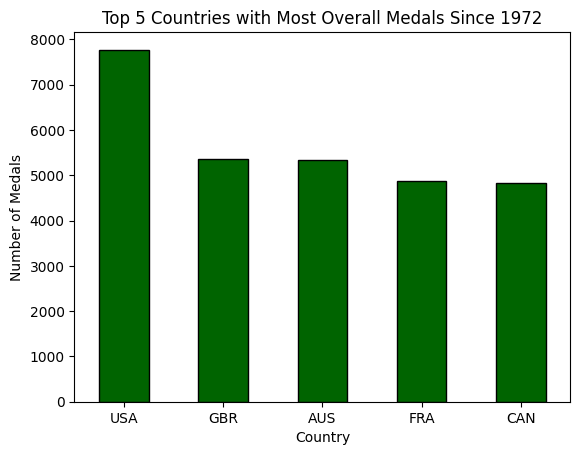

In [10]:
#sort the dataframe by NOC and then the number of medals per NOC
medals_by_country = athlete_df.groupby('NOC')['Medal'].size()

#make the series to be highest number of medals to lowest
sorted_medals_by_country = medals_by_country.sort_values(ascending=False)

#plot the 5 countries with the most medals as a bar graph
sorted_medals_by_country.head(5).plot(kind='bar', color='darkgreen', edgecolor='black')

#set the x axis, y axis, title, and x ticks
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.title('Top 5 Countries with Most Overall Medals Since 1972')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SCG'),
  Text(1, 0, 'CRO'),
  Text(2, 0, 'SRB'),
  Text(3, 0, 'MNE'),
  Text(4, 0, 'LTU')])

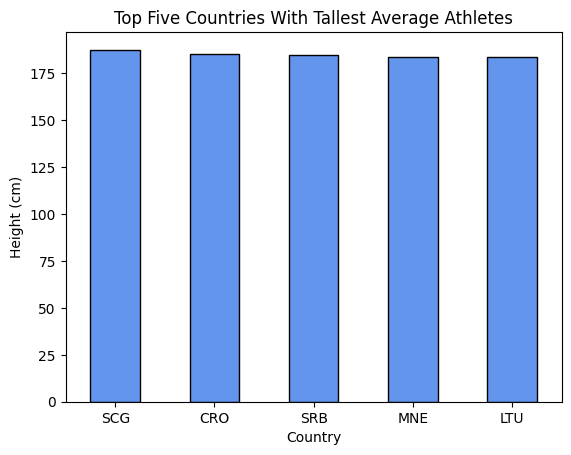

In [11]:
#sort by country, and find the average height of each country
heights = athlete_df.groupby('NOC')['Height'].mean()

#sort the heights
sorted_heights = heights.sort_values(ascending=False)

#plot the 5 countries with the tallest average athletes
sorted_heights.head(5).plot(kind='bar', color='cornflowerblue', edgecolor='black')

#set the x axis, y axis, title, and x ticks
plt.xlabel('Country')
plt.ylabel('Height (cm)')
plt.title('Top Five Countries With Tallest Average Athletes')
plt.xticks(rotation=0)

Text(1984, 175, 'USA boycotted Olympics')

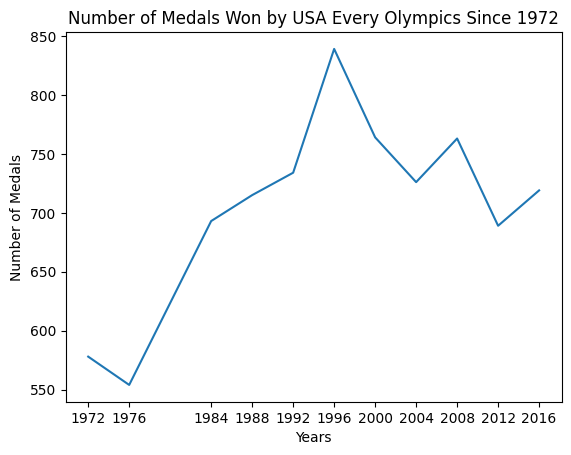

In [12]:
#sort the data frame to only show USA athletes
usa_athletes = athlete_df[athlete_df['NOC'] == 'USA']

#group by year, and see how many medals were won that year 
usa_medals_by_year = usa_athletes.groupby('Year')['Medal'].size().reset_index()

#plot the medals over time as a line chart
plt.plot(usa_medals_by_year['Year'], usa_medals_by_year['Medal'])

#set the x axis, y axis, title, and x ticks
plt.xlabel('Years')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by USA Every Olympics Since 1972')
plt.xticks(usa_medals_by_year['Year'])

#annotate the graph to describe why 1980 is missing
plt.annotate(f'USA boycotted Olympics', xy=(1980, 155), 
                 xytext=(1984, 175), 
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Athletics'),
  Text(1, 0, 'Swimming'),
  Text(2, 0, 'Gymnastics'),
  Text(3, 0, 'Rowing'),
  Text(4, 0, 'Fencing')])

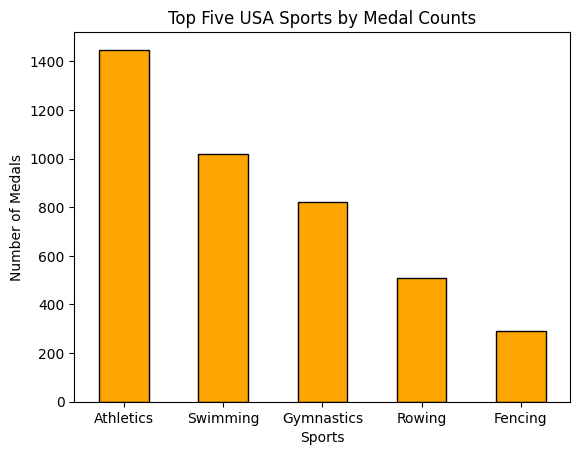

In [13]:
#sort the data frame to only show USA athletes
usa_athletes = athlete_df[athlete_df['NOC'] == 'USA']

#sort the data frame to find how many medals the US won per sport
usa_sports = usa_athletes.groupby('Sport').size().sort_values(ascending=False)

#plot the top 5 sports with the most medals as a bar graph
usa_sports.head(5).plot(kind='bar', color='orange', edgecolor='black')

#set the x axis, y axis, title, and xticks
plt.xlabel('Sports')
plt.ylabel('Number of Medals')
plt.title('Top Five USA Sports by Medal Counts')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Height Distributions for Swimming, Gymnastics, Athletics, Tennis, and Weightlifting')

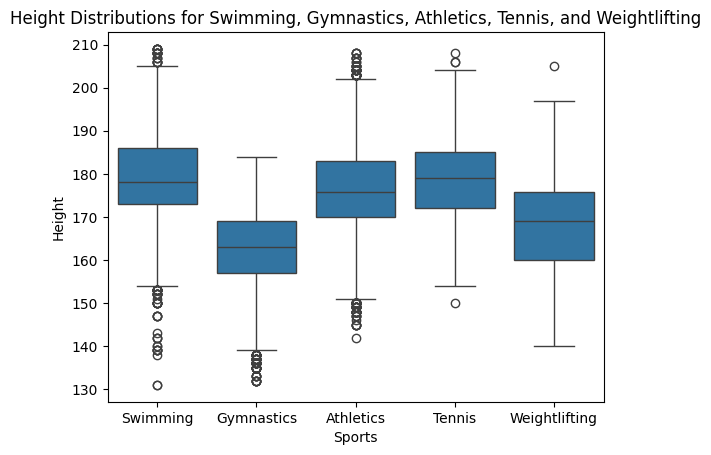

In [14]:
#sort athletes into separate dataframes for swimming, gymnastics, athletics, tennis, and weightlifting
swimmers = athlete_df[athlete_df['Sport'] == 'Swimming']
gymnasts = athlete_df[athlete_df['Sport'] == 'Gymnastics']
athletics = athlete_df[athlete_df['Sport'] == 'Athletics']
tennis = athlete_df[athlete_df['Sport'] == 'Tennis']
weights = athlete_df[athlete_df['Sport'] == 'Weightlifting']

#all the dataframes in a list
frames = [swimmers, gymnasts, athletics, tennis, weights]

#concatenate the dataframes into one
sports = pd.concat(frames)

#plot the data as multiple boxplots
sns.boxplot(data=sports, x='Sport', y='Height')

#set the x axis, y axis, and title
plt.xlabel('Sports')
plt.ylabel('Height')
plt.title('Height Distributions for Swimming, Gymnastics, Athletics, Tennis, and Weightlifting')

In [15]:
from scipy import stats

# filter to gold medalists and non gold medalists 
gold_medalists = athlete_df[athlete_df['Medal'] == 'Gold']
no_medalists = athlete_df[~(athlete_df['Medal'] == 'Gold')]

# extract height data
height_gold = gold_medalists['Height']
height_no_medal = no_medalists['Height']

# perform t-test
t_stat, p_value = stats.ttest_ind(height_gold.dropna(), height_no_medal.dropna())

# define significance level
alpha = 0.05

print("p value:", p_value)

# Check if p-value is less than alpha
if p_value < alpha:
    print("The difference in height between gold medalists and non-medalists is statistically significant.")
else:
    print("There is no statistically significant difference in height between gold medalists and non-medalists.")

p value: 7.94934635124774e-93
The difference in height between gold medalists and non-medalists is statistically significant.


## Models

For our first model, we will be using the KNN algorithm to determine whether or not an athlete will win a medal. 

In [16]:
#keep swimming sport
swimming_df = athlete_df[athlete_df['Sport'] == 'Swimming']

#make new medal column
swimming_df['NewMedal'] = ''

#change medal 
for index, item in swimming_df['Medal'].items():
    if item in ['Gold', 'Silver', 'Bronze']:
        swimming_df.at[index, 'NewMedal'] = 'Medal'
    else:
        swimming_df.at[index, 'NewMedal'] = 'No Medal'

C:\Users\khushi khan\AppData\Local\Temp\ipykernel_15116\2859147503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swimming_df['NewMedal'] = ''


<Axes: >

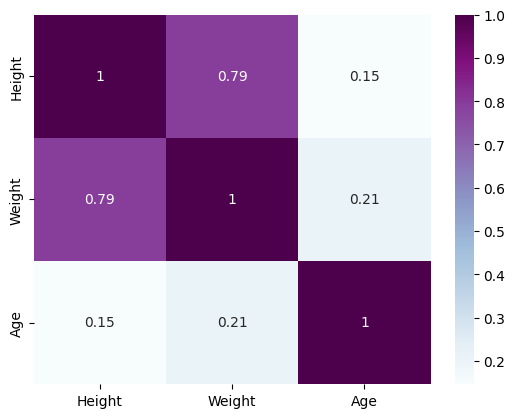

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#features to try using 
features_list = ['Height', 'Weight', 'Age']

#creating correlation matrix
corrmat = athlete_df[features_list].corr()
top_corr_features = corrmat.index

#plot the correlation matrix
sns.heatmap(athlete_df[top_corr_features].corr(), annot=True, cmap='BuPu')

In [18]:
#we decided to take out the age feature because the correlation was low
features_list = ['Height', 'Weight']

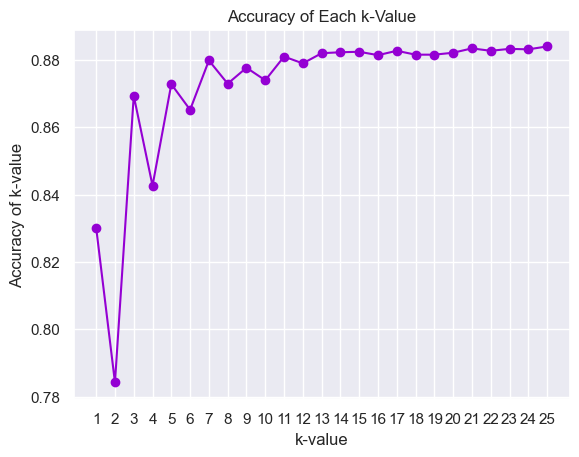

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X    = swimming_df[features_list] #the observations
y    = swimming_df['NewMedal'] #the label

#defining a range of k_values that i want to test the accuracy of
k_values = range(1, 26)

#will store accuracies 
accuracies = []

#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( 
                                        X,
                                        y,
                                        test_size=0.4,
                                        random_state=7,
                                        stratify=y
                                        ) 

for k in k_values:
    #build the k-nn model, experiment with different values of k and plot the results
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #predict the labels for the test set
    y_pred = knn.predict(X_test)
    
    #calculate the accuracy of each of the k values and append it to the accuracies list 
    k_value_accuracy = knn.score(X_test, y_test)
    accuracies.append(k_value_accuracy)
    
#plotting the graph of k-value
plt.plot(k_values, accuracies, marker='o', color='darkviolet')
plt.title('Accuracy of Each k-Value')
plt.xlabel('k-value')
plt.ylabel('Accuracy of k-value')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [20]:
#creating instance of knn model with the highest k_value, 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
    
#predict the labels for the test set
y_pred = knn.predict(X_test)
    
#calculate the accuracy of each of the k values and append it to the accuracies list 
k_value_accuracy = knn.score(X_test, y_test)
accuracies.append(k_value_accuracy)

In [21]:
#the target names
target_names = ['Medal', 'No medal']

#creating classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

       Medal       0.52      0.04      0.07       820
    No medal       0.89      1.00      0.94      6144

    accuracy                           0.88      6964
   macro avg       0.70      0.52      0.51      6964
weighted avg       0.84      0.88      0.84      6964



The model has a moderate precision for 'Medal', at 0.52. It isn't able to predict a medal very accurately. The recall is extremely low, at 0.04, showing that the model isn't good at capturing the instances of medals. The f1-score is 0.07, showing that the model is poor in predicting the 'Medal' class. 

The model has a high precision for 'No medal', at 0.89. It is able to predict a medal very accurately. The recall is extremely high, at 1.00, showing that the model is very good at capturing the instances of medals. The f1-score is 0.94, showing that the model is great at predicting the 'Medal' class. 

The overall accuracy of the model is 0.88. However, this could also be skewed due to the fact that there will be more people receiving no medal compared to those receiving a medal. 

This brings up the conversation about possibly implementing different features, outside of athleticism, that could possibly be better predictors as to whether or not someone will win a medal.

We're thinking of taking out age as a feature in the future, as it didn't initially seem to correlate much with the other features.